In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from scipy import stats
from scipy.stats import norm, skew

## Import & Visualize

In [2]:
data_train = pd.read_csv('/Users/savage/Kaggle/house/raw/train.csv')
data_test = pd.read_csv('/Users/savage/Kaggle/house/raw/test.csv')

In [3]:
data_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
combine = [data_train, data_test]

In [6]:
ID_train, ID_test = data_train['Id'], data_test['Id']
for data in combine:
    data.drop(['Id'], axis=1, inplace=True)

Divide features into numerical and categorical.

In [7]:
numerical = data_train.select_dtypes(exclude='object').columns
categorical = data_train.select_dtypes(include='object').columns

Plot numerical features.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


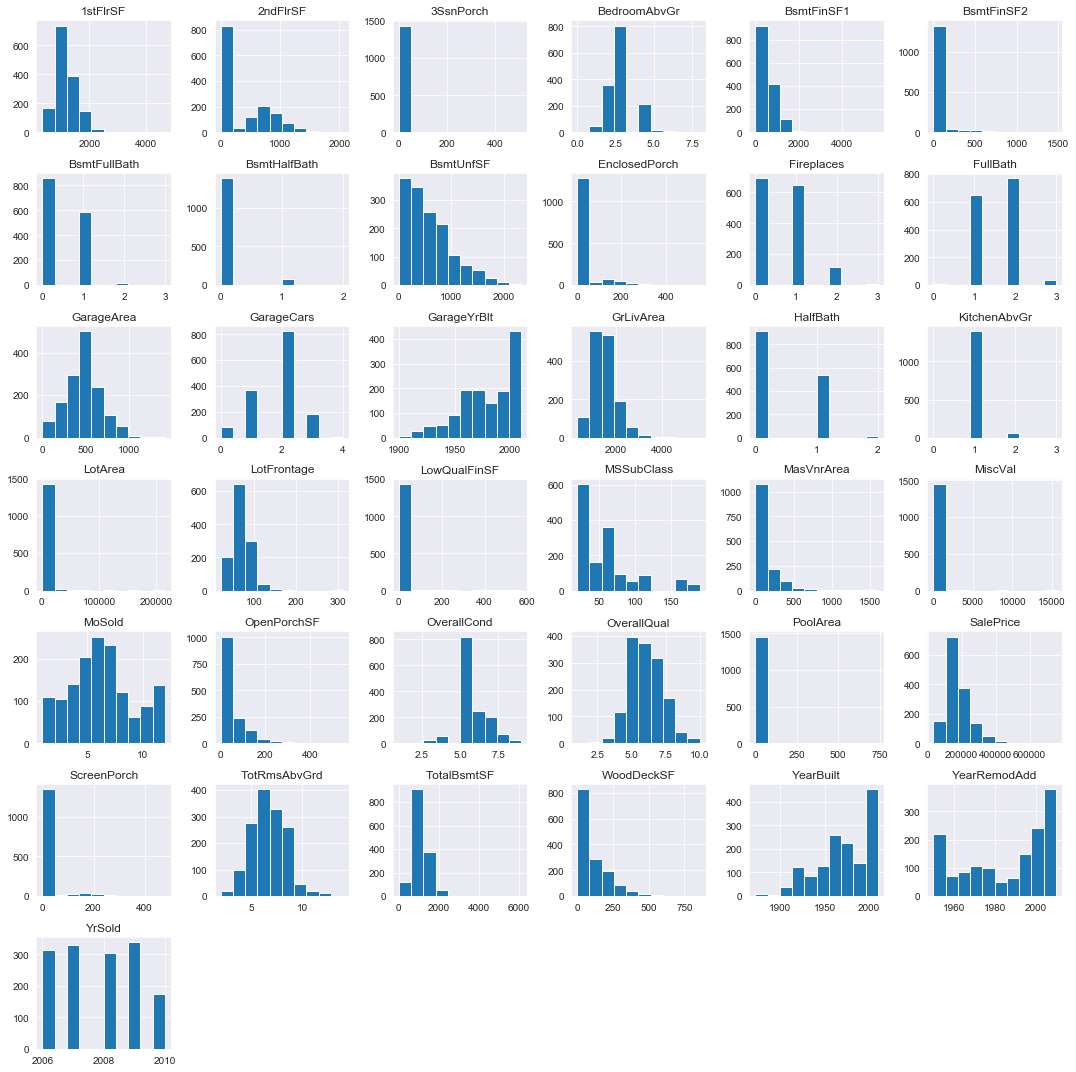

In [8]:
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()
data_train[numerical].hist(ax=ax)
fig.tight_layout()
fig.show()

`Scatter` numerical features with `SalePrice`.

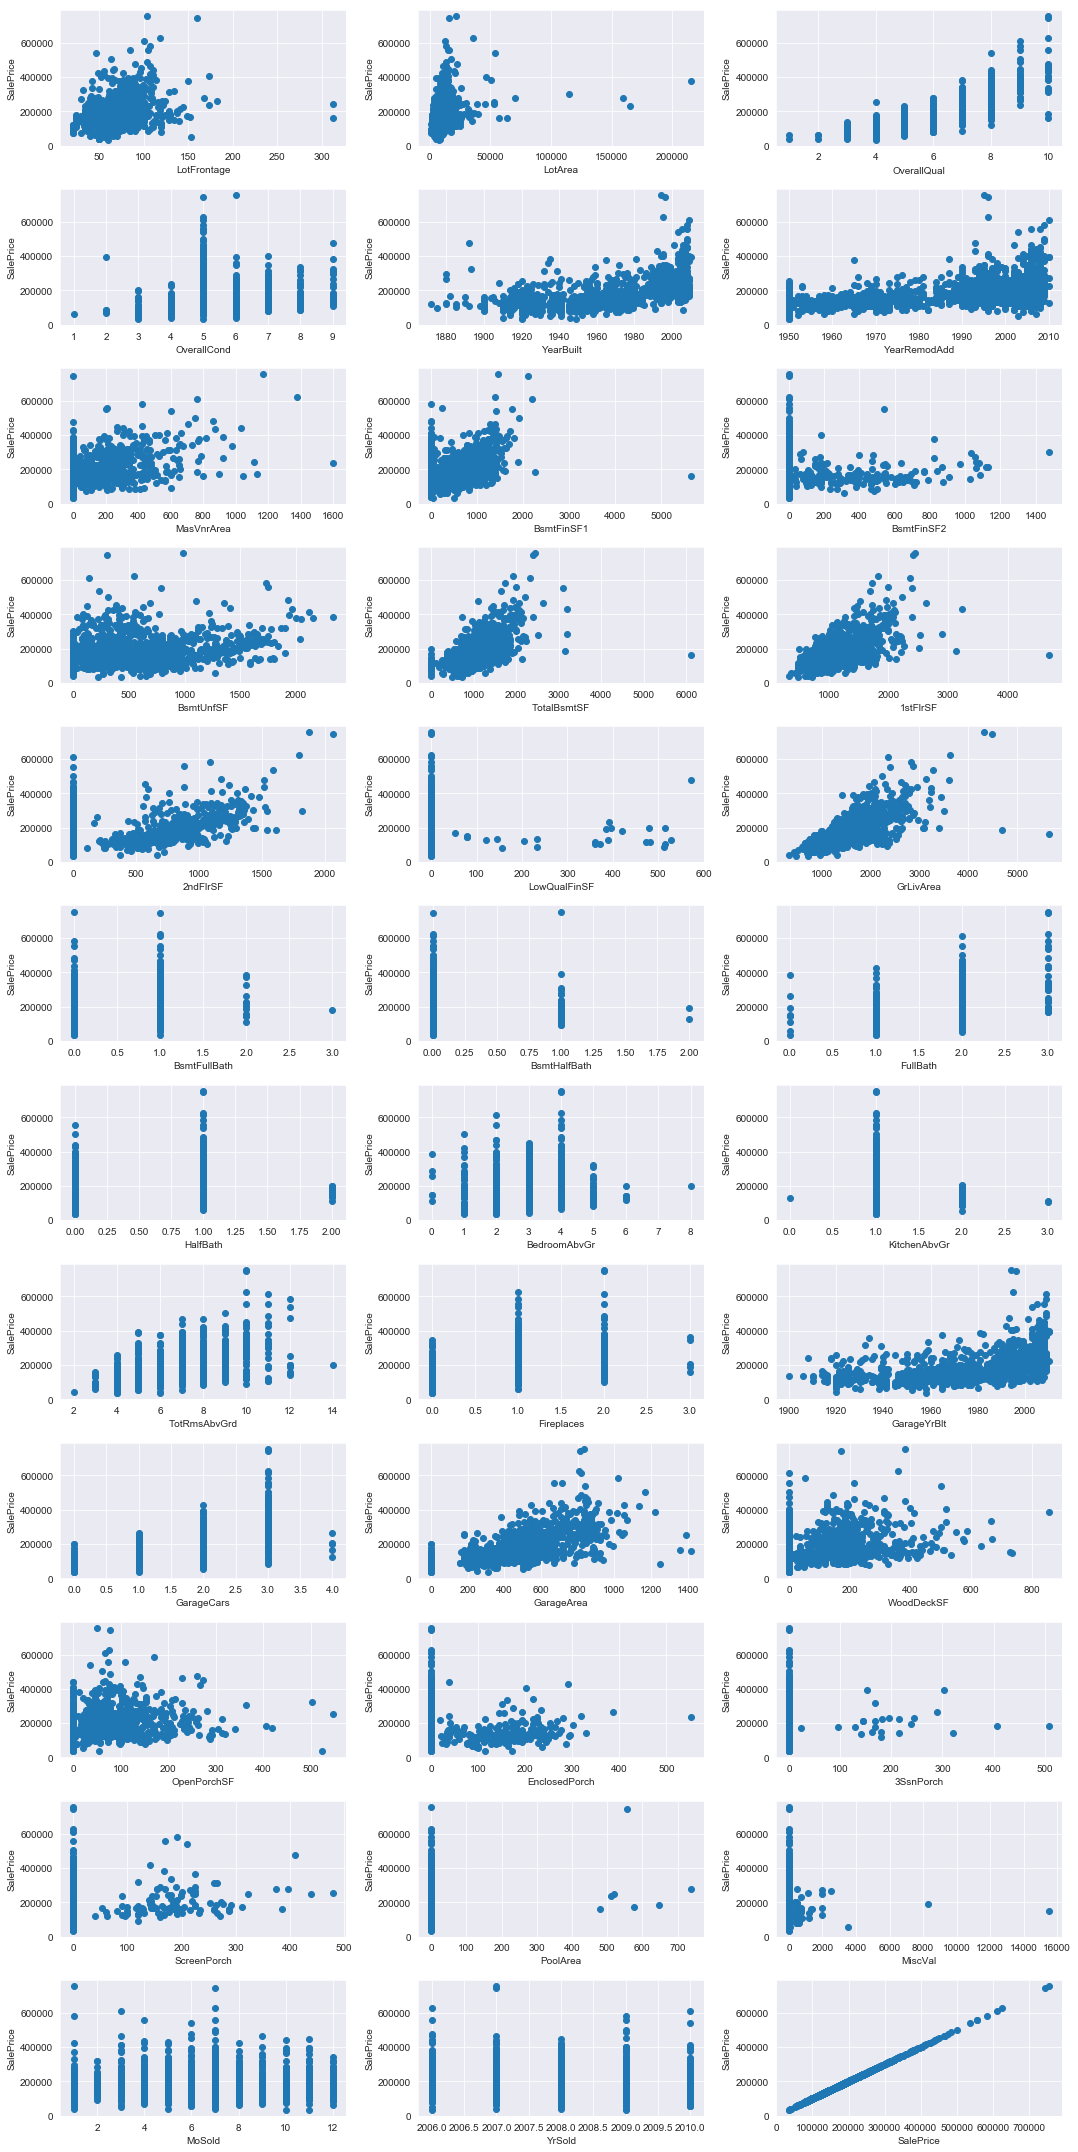

In [9]:
fig = plt.figure(figsize=(15, 30))
for i, col in enumerate(numerical[1:]):
    fig.add_subplot(12, 3, i+1)
    plt.scatter(data_train[col], data_train['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
fig.tight_layout()

`barplot` categorical features with `SalePrice`.

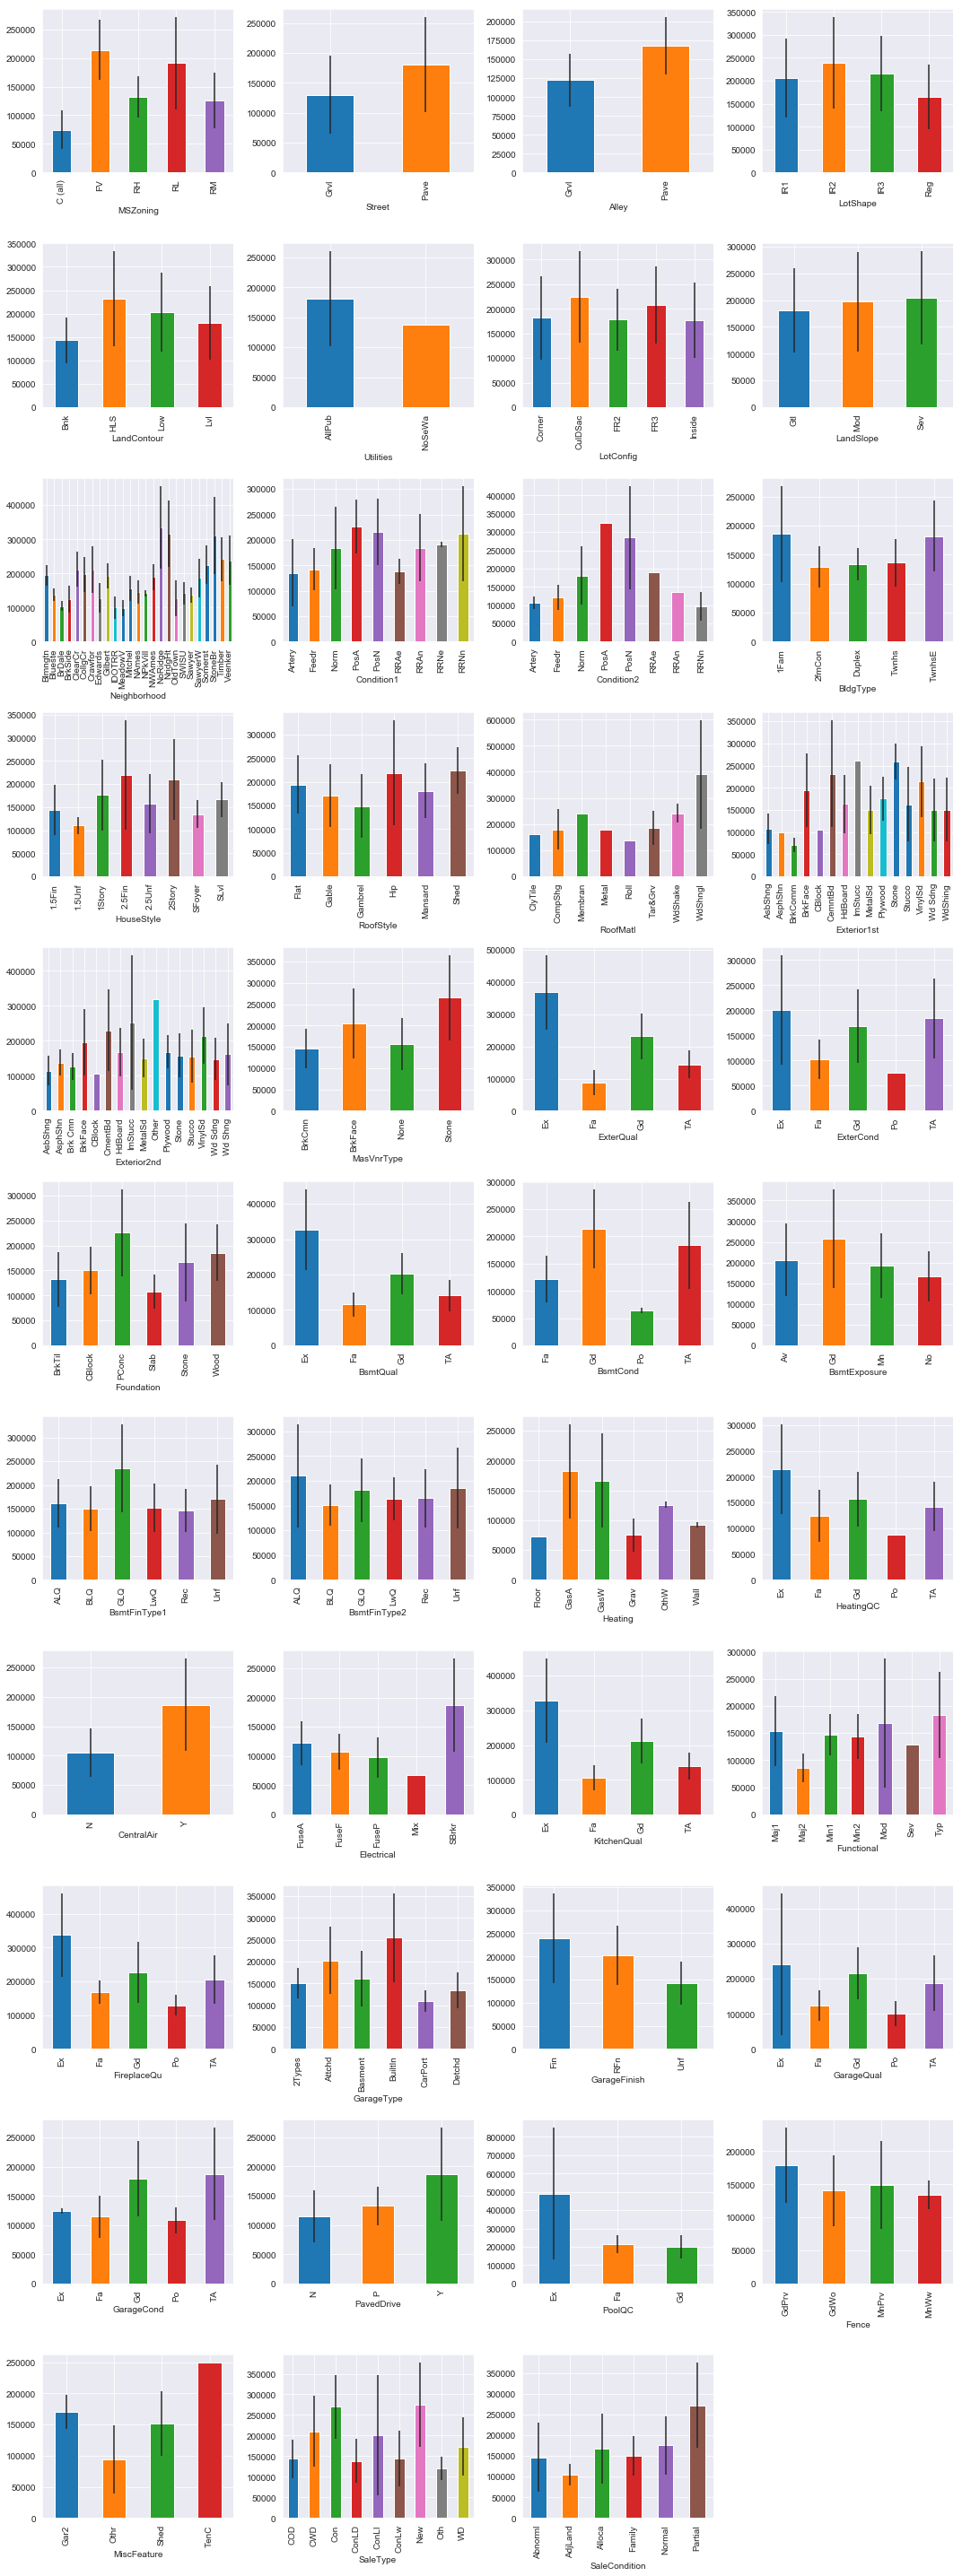

In [10]:
fig = plt.figure(figsize=(15, 40))
for i, col in enumerate(categorical):
    fig.add_subplot(11, 4, i+1)
    data_train.groupby(col).mean()['SalePrice'].plot(kind='bar', 
                                                     yerr = data_train.groupby(col).std())
fig.tight_layout()

## Preprocessing

### Remove outliers in `GrLivArea`

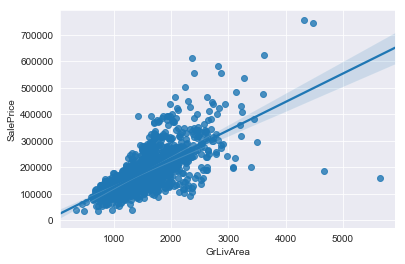

In [11]:
fig, ax = plt.subplots()
sns.regplot(data=data_train, x='GrLivArea', y='SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

Delete the two extreme points over the right-bottom corner.

In [12]:
data_train.drop(data_train[(data_train['GrLivArea'] > 4000) & 
                           (data_train['SalePrice'] < 200000)].index, 
                inplace=True)

### Norm `SalePrice` 

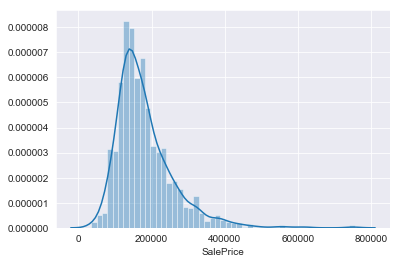

In [13]:
sns.distplot(data_train['SalePrice'])

Try to norm it by `log1p`.

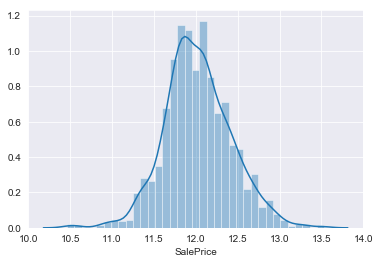

In [14]:
sns.distplot(np.log1p(data_train['SalePrice']))

In [15]:
data_train['SalePrice'] = np.log1p(data_train['SalePrice'])

### Fill the missing data

In [16]:
data_train.isnull().sum().sort_values(ascending=False)

PoolQC           1452
MiscFeature      1404
Alley            1367
Fence            1177
FireplaceQu       690
LotFrontage       259
GarageType         81
GarageCond         81
GarageFinish       81
GarageQual         81
GarageYrBlt        81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
RoofMatl            0
Exterior1st         0
RoofStyle           0
ExterQual           0
Exterior2nd         0
YearBuilt           0
ExterCond           0
Foundation          0
YearRemodAdd        0
SalePrice           0
OverallCond         0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [17]:
data_train.isnull().sum().sum()

6958

First fill in 3 main types:

In [18]:
fill_0 = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtHalfBath', 'BsmtFullBath', 
          'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'MasVnrArea']
fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType',
            'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtCond', 'BsmtExposure', 
             'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType']
fill_mode = ['MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd',
            'SaleType']

In [19]:
for data in combine:
    for col in fill_0:
        data[col] = data[col].fillna(0)
    for col in fill_none:
        data[col] = data[col].fillna('None')
    for col in fill_mode:
        data[col] = data[col].fillna(data[col].mode()[0])

Then deal with other features:

In [20]:
for data in combine:
    data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x:
                                                                               x.fillna(x.median()))
    data.drop(['Utilities'], axis=1, inplace=True)
    data['Functional'] = data['Functional'].fillna('Typ')

Check if there's still any remaining missing data.

In [21]:
data_train.isnull().sum().sum()

0

In [22]:
data_test.isnull().sum().sum()

0

### More feature engineering

Convert some numerical features that are categorical actually into categorial.

In [23]:
for data in combine:
    data['MSSubClass'] = data['MSSubClass'].apply(str)
    data['OverallCond'] = data['OverallCond'].astype(str)
    data['YrSold'] = data['YrSold'].astype(str)
    data['MoSold'] = data['MoSold'].astype(str)

Encode categorial features.

In [24]:
from sklearn.preprocessing import LabelEncoder
cols_le = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']
for data in combine:
    for col in cols_le:
        le = LabelEncoder()
        le.fit(list(data[col].values))
        data[col] = le.transform(list(data[col].values))

Add 1 feature manually.

In [25]:
for data in combine:
    data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

In [26]:
y_train = data_train['SalePrice'].values
data_train.drop(['SalePrice'], axis=1, inplace=True)

In [27]:
for data in combine:
    num = data.dtypes[data.dtypes != 'object'].index
    skew_feat = data[num].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
    print(pd.DataFrame({'Skewness': skew_feat}).head(5))

               Skewness
MiscVal       24.434913
PoolArea      15.932532
LotArea       12.560986
3SsnPorch     10.286510
LowQualFinSF   8.995688
               Skewness
PoolArea      20.176117
MiscVal       20.054543
LowQualFinSF  16.150628
3SsnPorch     12.511336
LandSlope      4.963280


Get features dummied.

In [28]:
n_train = data_train.shape[0]
n_test = data_test.shape[0]
all_df = pd.concat([data_train, data_test], sort=False)
all_df = pd.get_dummies(all_df)

In [29]:
X_train = all_df[:n_train]
X_test = all_df[n_train:]

In [30]:
for data in combine:
    print(data.shape)

(1458, 79)
(1459, 79)


## Modeling

In [31]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

### XGB

In [32]:
reg_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, learning_rate=0.1, max_depth=3, 
                           min_child_weight=1.5, n_estimators=7200, reg_alpha=0.9, reg_lambda=0.6,
                           subsample=0.2, seed=42, silent=1)
reg_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0.0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1.5, missing=None,
       n_estimators=7200, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0.9, reg_lambda=0.6, scale_pos_weight=1,
       seed=42, silent=1, subsample=0.2)

In [33]:
print(cross_val_score(reg_xgb, X_train, y_train, cv=5))

[0.90934921 0.91008085 0.90171362 0.90309409 0.90429909]


### Other models

In [34]:
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)
print(cross_val_score(reg_rf, X_train, y_train, cv=5))

[0.86048372 0.87910459 0.86072281 0.86635982 0.85484054]


In [35]:
reg_lasso = Lasso()
reg_lasso.fit(X_train, y_train)
print(cross_val_score(reg_lasso, X_train, y_train, cv=5))

[0.82059749 0.83142985 0.83017216 0.79277335 0.81596921]


In [36]:
reg_ridge = Ridge()
reg_ridge.fit(X_train, y_train)
print(cross_val_score(reg_ridge, X_train, y_train, cv=5))

[0.91710086 0.90644381 0.89578054 0.91847324 0.9151016 ]


In [37]:
reg_ela = ElasticNet()
reg_ela.fit(X_train, y_train)
print(cross_val_score(reg_ela, X_train, y_train, cv=5))

[0.83080714 0.84855071 0.85160623 0.81414726 0.82894571]


In [38]:
reg_dt = DecisionTreeRegressor()
reg_dt.fit(X_train, y_train)
print(cross_val_score(reg_dt, X_train, y_train, cv=5))

[0.77323977 0.72595169 0.7704659  0.76002551 0.71609717]


In [39]:
reg_ada = AdaBoostRegressor()
reg_ada.fit(X_train, y_train)
print(cross_val_score(reg_ada, X_train, y_train, cv=5))

[0.77291853 0.85905696 0.83093015 0.83106201 0.82808499]


In [40]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, 
                       train_sizes=np.linspace(0.05, 1., 20), verbose=0, plot=True):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Numbers of samples')
    plt.ylabel('Score')
    plt.gca().invert_yaxis()
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color='b')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, alpha=0.1, color='r')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Train Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r', label='Test Score')
    plt.legend(loc='best')
    plt.draw()
    plt.gca().invert_yaxis()
    plt.show()

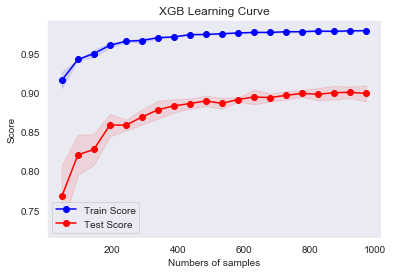

In [41]:
plot_learning_curve(reg_xgb, 'XGB Learning Curve', X_train, y_train)

### Bagging

In [42]:
from sklearn.ensemble import BaggingRegressor
bag_xgb = BaggingRegressor(reg_xgb, n_estimators=20, n_jobs=-1, max_samples=0.8,
                          max_features=1.0, bootstrap=True, bootstrap_features=False)
bag_xgb.fit(X_train, y_train)
print(cross_val_score(bag_xgb, X_train, y_train, cv=5))

[0.91657554 0.91462446 0.90723573 0.91377843 0.91015418]


In [43]:
predictions = bag_xgb.predict(X_test)
predictions = np.expm1(predictions)
ans = pd.DataFrame({'Id': ID_test, 'SalePrice': predictions})

In [44]:
ans.to_csv('/Users/savage/Kaggle/house/ans/bag_xgb.csv', index=False)
print('OK')

OK
